<a href="https://colab.research.google.com/github/gunjanak/Pytorch_Basic_Codes/blob/main/Single_obj_dect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load create

In [1]:
import pandas as pd
import os

In [2]:
path2data = '/content/drive/MyDrive/Colab Notebooks/Pytorch/Single-Object-Detection/data'

In [3]:
path2labels = os.path.join(path2data,"Training400","Fovea_location.xlsx")

In [4]:
labels_df = pd.read_excel(path2labels,index_col="ID")

In [5]:
labels_df.head()

imgName      Fovea_X      Fovea_Y
ID                                     
1   A0001.jpg  1182.264278  1022.018842
2   A0002.jpg   967.754046  1016.946655
3   A0003.jpg  1220.206714   989.944033
4   A0004.jpg  1141.140888  1000.594955
5   A0005.jpg  1127.371832  1071.109440

In [6]:
labels_df.tail()

imgName     Fovea_X     Fovea_Y
ID                                    
396  N0307.jpg  823.024991  690.210211
397  N0308.jpg  647.598978  795.653188
398  N0309.jpg  624.571803  755.694880
399  N0310.jpg  687.523044  830.449187
400  N0311.jpg  746.107631  759.623062

In [7]:
import seaborn as sns

<Axes: xlabel='Fovea_X', ylabel='Fovea_Y'>

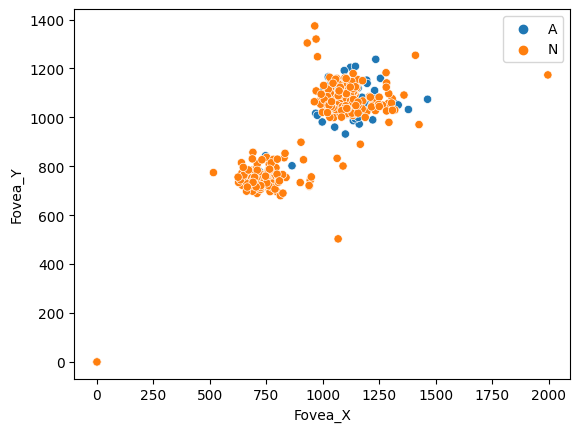

In [8]:
AorN = [imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'],y=labels_df['Fovea_Y'],hue=AorN)

In [9]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

#fix random seed
np.random.seed(2019)

In [10]:
plt.rcParams['figure.figsize'] = (15,9)
plt.subplots_adjust(wspace=0,hspace=0.3)
nrows,ncols = 2,3

<Figure size 1500x900 with 0 Axes>

In [11]:
#selecting a random set of image ids
imgName = labels_df["imgName"]
ids = labels_df.index
rndIds = np.random.choice(ids,nrows*ncols)
print(rndIds)

[ 73 371 160 294 217 191]


In [12]:
#A helper function to load an image and
#its label from the local files
def load_img_label(labels_df,id_):
  imgName = labels_df["imgName"]
  if imgName[id_][0] == "A":
    prefix = "AMD"
  else:
    prefix = "Non-AMD"

  fullPath2img = os.path.join(path2data,"Training400",prefix,imgName[id_])
  img = Image.open(fullPath2img)
  x = labels_df["Fovea_X"][id_]
  y = labels_df["Fovea_Y"][id_]
  label = (x,y)
  return img,label

In [13]:
#Helper function to show the image and label as a counding box
def show_img_label(img,label,w_h=(50,50),thickness=2):
  w,h = w_h
  cx,cy = label
  draw = ImageDraw.Draw(img)
  draw.rectangle(((cx-w/2,cy-h/2),(cx+w/2,cy+h/2)),outline="green",width=thickness)
  plt.imshow(np.asarray(img))

(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


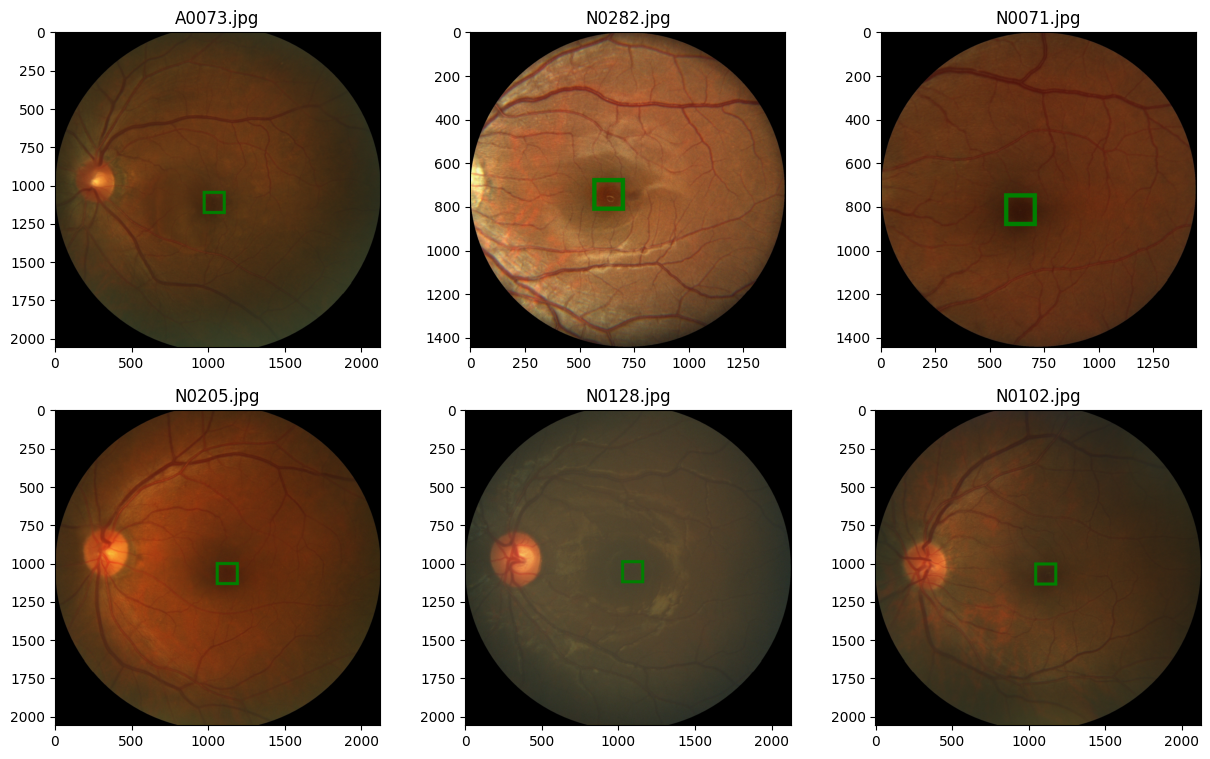

In [14]:
#Show the selected images together with the fovea bounding boxes
for i,id_ in enumerate(rndIds):
  img,label = load_img_label(labels_df,id_)
  print(img.size,label)
  plt.subplot(nrows,ncols,i+1)
  show_img_label(img,label,w_h = (150,150),thickness=20)
  plt.title(imgName[id_])


In [15]:
#Collecting width and height
h_list,w_list = [],[]
for id_ in ids:
  if imgName[id_][0] == "A":
    prefix = "AMD"
  else:
    prefix = "Non-AMD"
  fullPath2img = os.path.join(path2data,"Training400",prefix,imgName[id_])
  img = Image.open(fullPath2img)
  h,w = img.size
  h_list.append(h)
  w_list.append(w)

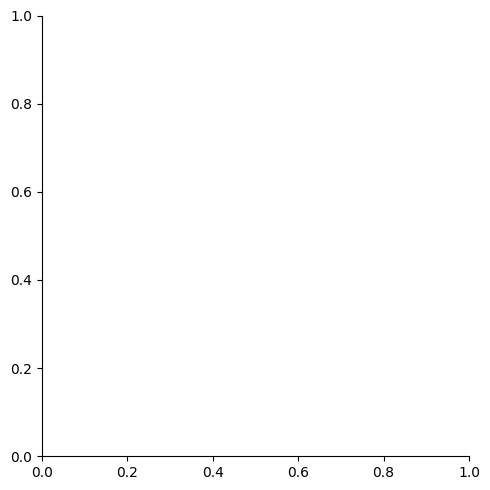

In [16]:
sns.displot(a=h_list,kde=False)

<ipython-input-17-ae1262f60da1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=w_list,kde=False)


<Axes: >

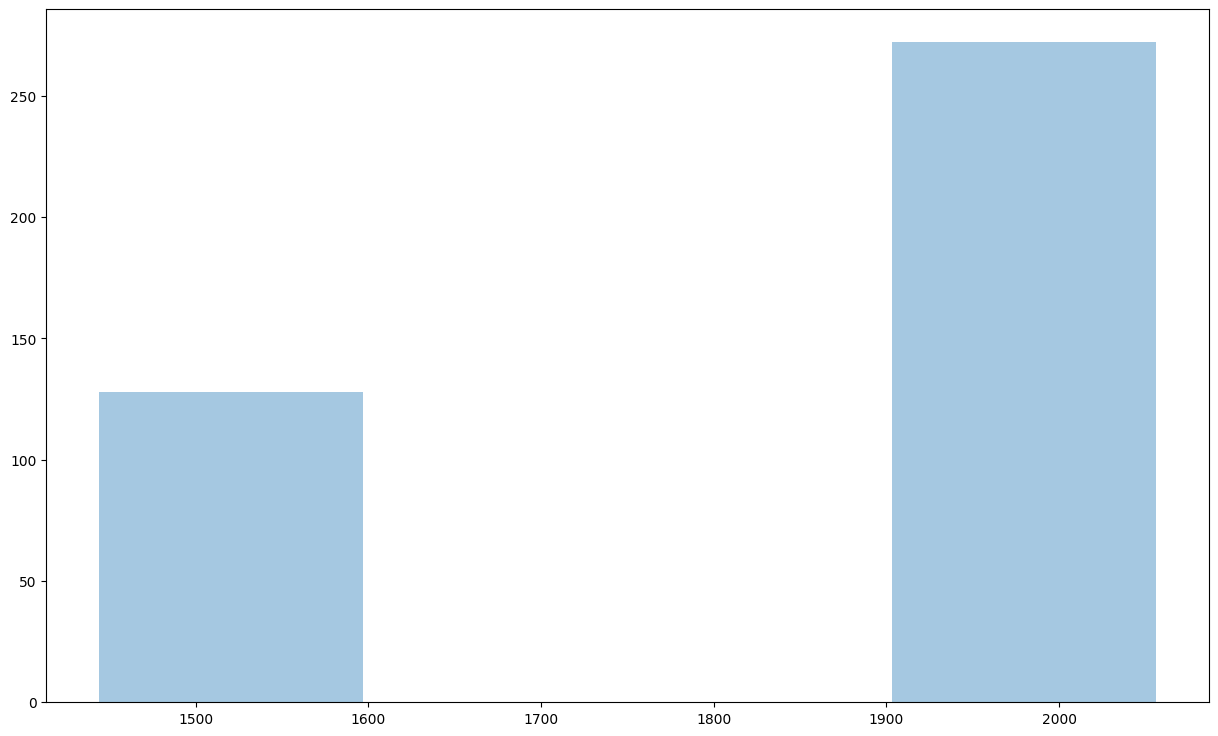

In [17]:
sns.distplot(a=w_list,kde=False)

#Data Transformation

In [18]:
import torchvision.transforms.functional as TF

In [19]:
def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
  w_orig,h_orig = image.size
  w_target,h_target = target_size
  cx,cy = label
  image_new = TF.resize(image,target_size)
  label_new = cx/w_orig*w_target,cy/h_orig*h_target
  return image_new,label_new

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


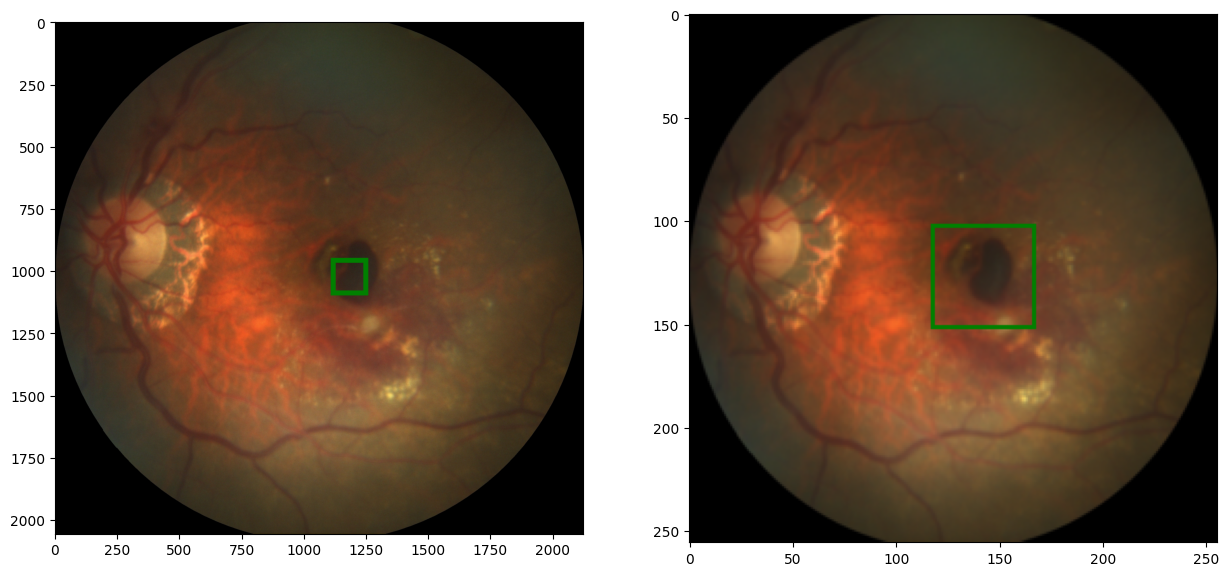

In [20]:
#Let's try resizing an image using the preceding function
img,label = load_img_label(labels_df,1)
print(img.size,label)
img_r,label_r = resize_img_label(img,label)
print(img_r.size,label_r)
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(img_r,label_r)

In [21]:
#Helper function to randomly filp images horizontally
def random_hflip(image,label):
  w,h = image.size
  x,y = label
  image = TF.hflip(image)
  label = w-x,y
  return image,label

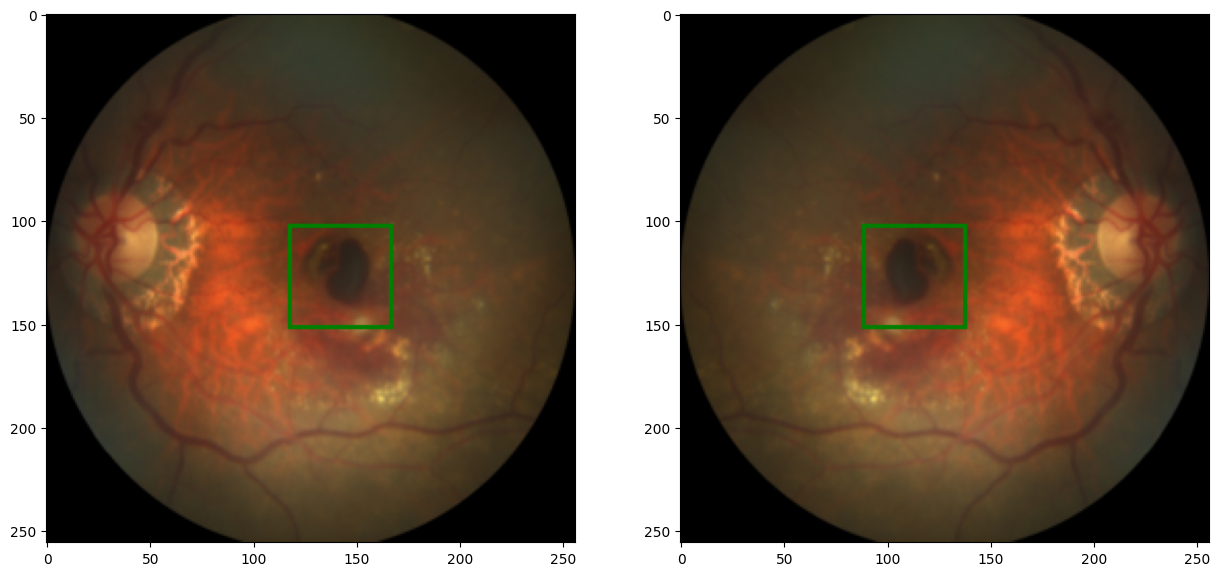

In [22]:
#Flipping an image using the preceding function
img,label = load_img_label(labels_df,1)
img_r,label_r = resize_img_label(img,label)
img_fh,label_fh = random_hflip(img_r,label_r)
plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fh,label_fh)

In [23]:
#Random filp vertically
def random_vflip(image,label):
  w,h = image.size
  x,y = label

  image = TF.vflip(image)
  label = x,w-y
  return image,label

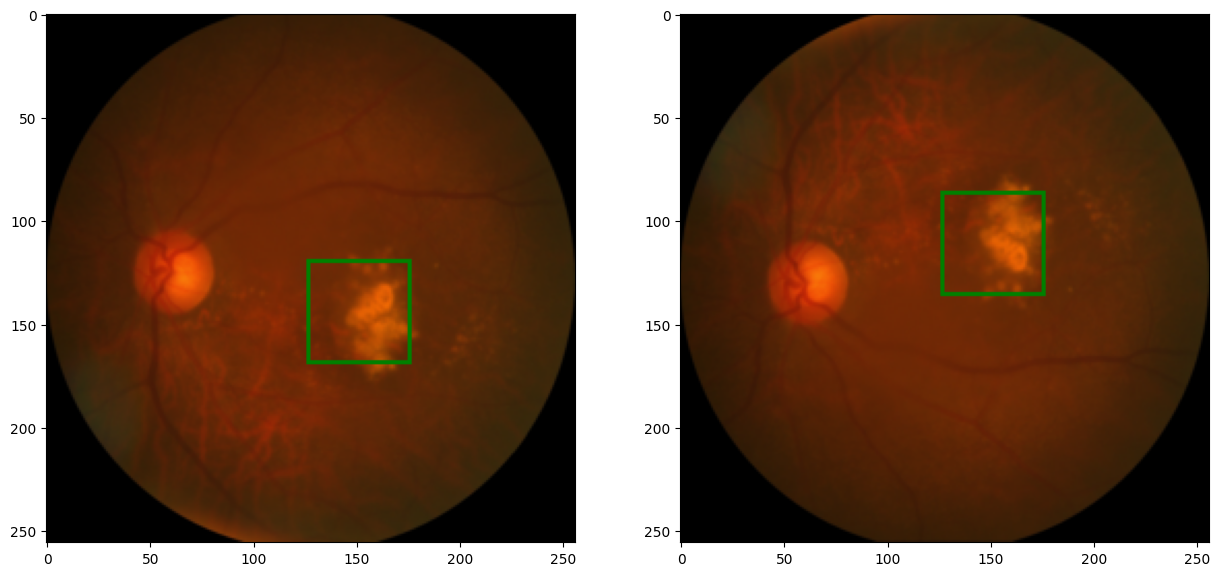

In [24]:
#flipping an image vertically
img,label = load_img_label(labels_df,7)
img_r,label_r = resize_img_label(img,label)
img_fv,label_fv = random_vflip(img_r,label_r)
plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fv,label_fv)

In [25]:
#Function to randomly shift or translate images in either direction
import numpy as np
np.random.seed(1)

def random_shift(image,label,max_translate=(0.2,0.2)):
  w,h = image.size
  max_t_w,max_t_h =max_translate
  cx,cy = label
  trans_coef = np.random.rand()*2-1
  w_t= int(trans_coef*max_t_w*w)
  h_t = int(trans_coef*max_t_h*h)
  image = TF.affine(image,translate=(w_t,h_t),shear=0,angle=0,scale=1)
  label = cx+w_t,cy+h_t
  return image,label

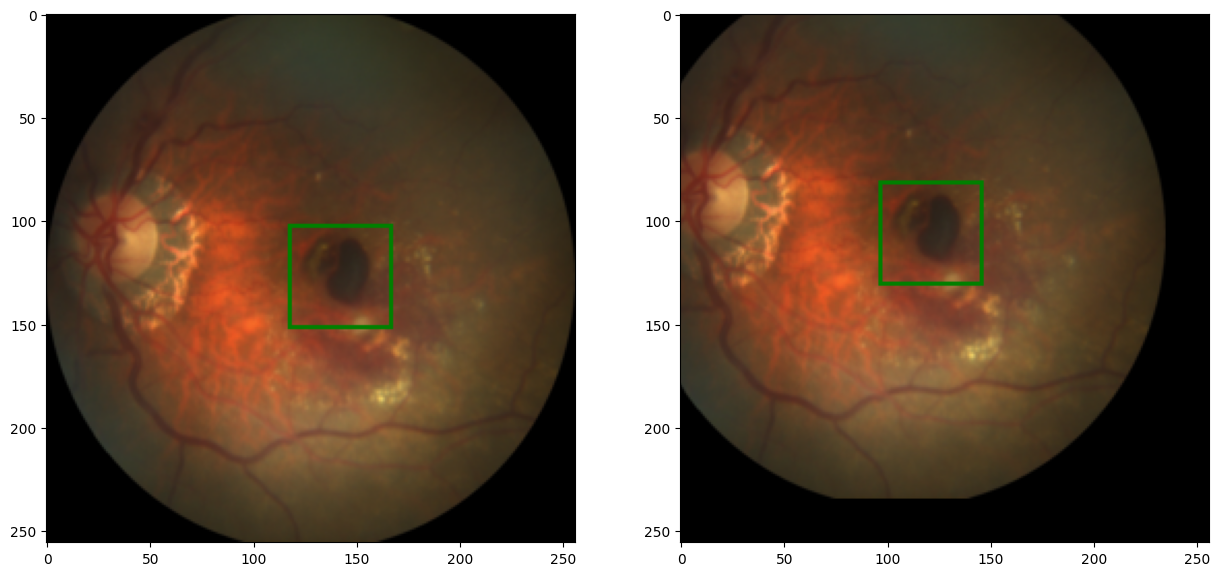

In [26]:
img,label = load_img_label(labels_df,1)
img_r,label_r = resize_img_label(img,label)
img_t,label_t = random_shift(img_r,label_r,max_translate=(.5,.5))
plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [27]:
import random

In [28]:
def scale_label(a,b):
  div = [ai/bi for ai,bi in zip(a,b)]
  return div

In [29]:
#function containing all the other trans formations
def transformer(image,label,params):
  image,label = resize_img_label(image,label,params["target_size"])
  if random.random() < params["p_hflip"]:
    image,label = random_hflip(image,label)
  if random.random() < params["p_vflip"]:
    image,label = random_vflip(image,label)
  if random.random() < params["p_shift"]:
    image,label = random_shift(image,label,params["max_translate"])
  if random.random() < params["p_brightness"]:
    brightness_factor = 1+(np.random.rand()*2-1)*params["brightness_factor"]
    image = TF.adjust_brightness(image,brightness_factor)
  if random.random() <params["p_contrast"]:
    contrast_factor = 1+ (np.random.rand()*2-1)*params["contrast_factor"]
    image = TF.adjust_contrast(image,contrast_factor)
  if random.random() < params["p_gamma"]:
    gamma = 1 + (np.random.rand()*2-1)*params["gamma"]
    image = TF.adjust_gamma(image,gamma)

  if params["scale_label"]:
    label = scale_label(label,params["target_size"])

  image = TF.to_tensor(image)
  return image,label

In [30]:
np.random.seed(0)
random.seed(0)

In [31]:
img,label = load_img_label(labels_df,1)
params = {
    "target_size":(256,256),
    "p_hflip":1.0,
    "p_vflip":1.0,
    "p_shift":1.0,
    "max_translate":(0.5,0.5),
    "p_brightness":1.0,
    "brightness_factor":0.8,
    "p_contrast":1.0,
    "contrast_factor":0.8,
    "p_gamma":1.0,
    "gamma":0.4,
    "scale_label":False
}
img_t,label_t= transformer(img,label,params)

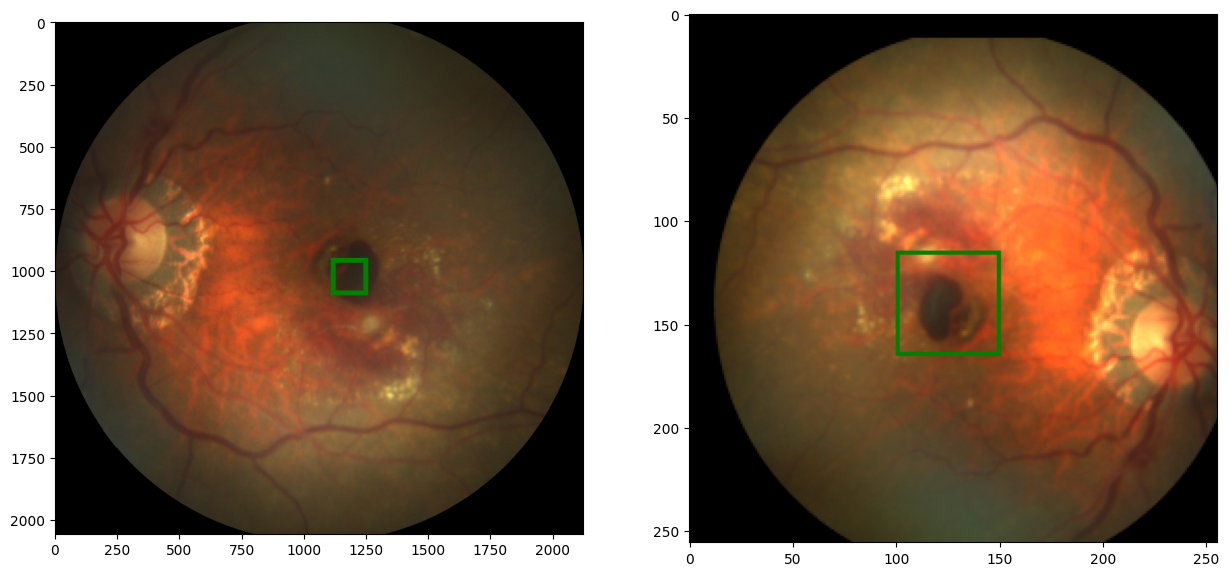

In [32]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

In [33]:
def rescale_label(a,b):
  div = [ai*bi for ai,bi in zip(a,b)]
  return div

#Creating custom datasets

In [34]:
from torch.utils.data import Dataset
from PIL import Image

In [35]:
class AMD_dataset(Dataset):
  def __init__(self,path2data,transform,trans_params):
    path2labels = os.path.join(path2data,"Training400",
                               "Fovea_location.xlsx")
    labels_df = pd.read_excel(path2labels,index_col="ID")
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values
    self.imgName = labels_df["imgName"]
    self.ids = labels_df.index
    self.fullPath2img = [0]*len(self.ids)
    for id_ in self.ids:
      if self.imgName[id_][0]=="A":
        prefix="AMD"
      else:
        prefix="Non-AMD"
      self.fullPath2img[id_-1] = os.path.join(path2data,"Training400",
                                              prefix,self.imgName[id_])
      self.transform = transform
      self.trans_params = trans_params


  def __len__(self):
    #return size of dataset
    return len(self.labels)
  def __getitem__(self,idx):
    image = Image.open(self.fullPath2img[idx])
    label = self.labels[idx]
    image,label = self.transform(image,label,self.trans_params)
    return image,label



In [36]:
trans_params_train = {
    "target_size":(256,256),
    "p_hflip":0.5,
    "p_vflip":0.5,
    "p_shift":0.5,
    "max_translate":(0.2,0.2),
    "p_brightness":0.5,
    "brightness_factor":0.2,
    "p_contrast":0.5,
    "contrast_factor":0.2,
    "p_gamma":0.5,
    "gamma":0.2,
    "scale_label":True,
}

In [37]:
trans_params_val = {
    "target_size":(256,256),
    "p_hflip":0.0,
    "p_vflip":0.0,
    "p_shift":0.0,
    "p_brightness":0.0,
    "p_contrast":0.0,
    "p_gamma":0.0,
    "gamma":0.0,
    "scale_label":True
}

In [38]:
amd_ds1 = AMD_dataset(path2data,transformer,trans_params_train)
amd_ds2 = AMD_dataset(path2data,transformer,trans_params_val)

In [39]:
#split dataset into train and validation
from sklearn.model_selection import ShuffleSplit


In [40]:
sss = ShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
indices = range(len(amd_ds2))
for train_index,val_index in sss.split(indices):
  print(len(train_index))
  print("-"*10)
  print(len(val_index))


320
----------
80


In [41]:
from torch.utils.data import Subset
train_ds = Subset(amd_ds1,train_index)
print(len(train_ds))
val_ds = Subset(amd_ds2,val_index)
print(len(val_ds))

320
80


In [42]:
#Sample image from train_ds and val_ds
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [43]:
#define a function to show a tensor and its label
def show(img,label=None):
  npimg = img.numpy().transpose((1,2,0))
  plt.imshow(npimg)
  if label is not None:
    label = rescale_label(label,img.shape[1:])
    x,y = label
    plt.plot(x,y,'b+',markersize=20)

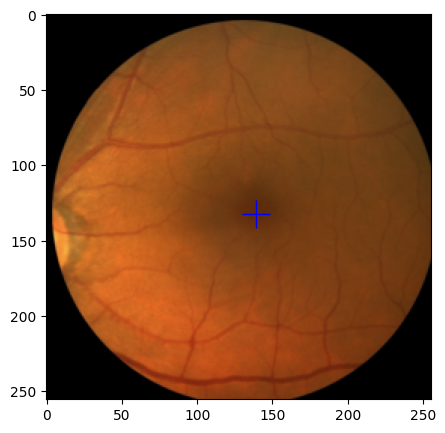

In [44]:
plt.figure(figsize=(5,5))
for img,label in train_ds:
  show(img,label)
  break

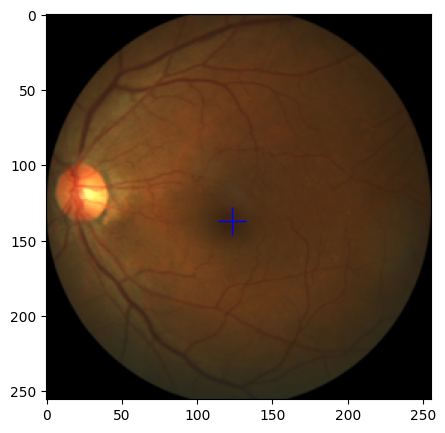

In [45]:
plt.figure(figsize=(5,5))
for img,label in val_ds:
  show(img,label)
  break

In [46]:
#define two data loaders for training and validation datasets
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds,batch_size=8,shuffle=True)
val_dl = DataLoader(val_ds,batch_size=16,shuffle=False)

In [47]:
#Get a batch of train_dl
for img_b,label_b in train_dl:
  print(img_b.shape,img_b.dtype)
  print(label_b)
  break

torch.Size([8, 3, 256, 256]) torch.float32
[tensor([0.6139, 0.5550, 0.4377, 0.5868, 0.6764, 0.4626, 0.5410, 0.5045],
       dtype=torch.float64), tensor([0.6380, 0.4943, 0.5255, 0.4881, 0.5769, 0.4947, 0.4768, 0.5145],
       dtype=torch.float64)]


In [48]:
#converting list to tensor
import torch
#extract a batch from training data
for img_b,label_b in train_dl:
  print(img_b.shape,img_b.dtype)
  #convert list to tensor
  label_b = torch.stack(label_b,1)
  label_b = label_b.type(torch.float32)
  print(label_b.shape,label_b.dtype)
  break

torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [49]:
#get a batch from val_dl
for img_b, label_b in val_dl:
  print(img_b.shape,img_b.dtype)
  #convert to tensor
  label_b = torch.stack(label_b,1)
  label_b = label_b.type(torch.float32)
  print(label_b.shape,label_b.dtype)
  break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32


#Creating a model

In [50]:
import torch.nn as nn
import torch.nn.functional as F

In [51]:
class Net(nn.Module):

  def __init__(self,params):
    super(Net,self).__init__()

    C_in,H_in,W_in = params["input_shape"]
    init_f = params["initial_filters"]
    num_outputs = params["num_outputs"]

    self.conv1 = nn.Conv2d(C_in,init_f,kernel_size=3,stride=2,padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in,2*init_f,kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in,4*init_f,kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in,8*init_f,kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in,16*init_f,kernel_size=3,padding=1)
    self.fc1 = nn.Linear(16*init_f,num_outputs)

  def forward(self,x):
    identity = F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = torch.cat((x,identity),dim=1)

    identity = F.avg_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = torch.cat((x,identity),dim=1)

    identity = F.avg_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x,2,2)
    x = torch.cat((x,identity),dim=1)

    identity = F.avg_pool2d(x,2,2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x,2,2)
    x = torch.cat((x,identity),dim=1)

    x = F.relu(self.conv5(x))
    x = F.adaptive_avg_pool2d(x,1)
    x = x.reshape(x.size(0),-1)

    x = self.fc1(x)
    return x




In [52]:
#Define an object of the Net class
params_model = {
    "input_shape":(3,256,256),
    "initial_filters":16,
    "num_outputs":2,
}

In [53]:
model = Net(params_model)

In [54]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  model = model.to(device)

In [55]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)


#Define loss function, optimizer and IOU metric

In [57]:
loss_func = nn.SmoothL1Loss(reduction="sum")
n,c = 8,2
y = 0.5*torch.ones(n,c,requires_grad=False)
print(y.shape)
target = torch.zeros(n,c,requires_grad=False)
print(target.shape)
loss = loss_func(y,target)
print(loss.item())
y = 2*torch.ones(n,c,requires_grad=True)
target = torch.zeros(n,c,requires_grad=False)
loss = loss_func(y,target)
print(loss.item())

torch.Size([8, 2])
torch.Size([8, 2])
2.0
24.0


In [58]:
#Optimizer
from torch import optim
opt = optim.Adam(model.parameters(),lr=3e-4)
def get_lr(opt):
  for param_group in opt.param_groups:
    return param_group['lr']

current_lr =  get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


In [59]:
#Learning rate schedule
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt,mode='min',factor=0.5,patience=20,verbose=1)

In [60]:
for i in range(100):
  lr_scheduler.step(1)

Epoch 00022: reducing learning rate of group 0 to 1.5000e-04.
Epoch 00043: reducing learning rate of group 0 to 7.5000e-05.
Epoch 00064: reducing learning rate of group 0 to 3.7500e-05.
Epoch 00085: reducing learning rate of group 0 to 1.8750e-05.


In [61]:
#Function to compute IOU
def cxcy2bbox(cxcy,w=50./256,h=50./256):
  w_tensor = torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
  h_tensor = torch.ones(cxcy.shape[0],1,device=cxcy.device)*h
  cx = cxcy[:,0].unsqueeze(1)
  cy = cxcy[:,1].unsqueeze(1)
  boxes = torch.cat((cx,cy,w_tensor,h_tensor),-1)
  return torch.cat((boxes[:,:2]-boxes[:,2:]/2,boxes[:,:2]+boxes[:,2:]/2),1)



In [62]:
torch.manual_seed(0)

In [63]:
cxcy = torch.rand(1,2)
print("center: ",cxcy*256)

center:  tensor([[127.0417, 196.6648]])


In [64]:
bb = cxcy2bbox(cxcy)
print("bounding box",bb*256)

bounding box tensor([[102.0417, 171.6648, 152.0417, 221.6648]])


In [65]:
import torchvision
def metrics_batch(output,target):
  output= cxcy2bbox(output)
  target = cxcy2bbox(target)
  iou = torchvision.ops.box_iou(output,target)
  return torch.diagonal(iou,0).sum().item()

In [66]:
n,c = 8,2
target = torch.rand(n,c,device=device)
target = cxcy2bbox(target)
metrics_batch(target,target)

8.0

In [67]:
def loss_batch(loss_func,output,target,opt=None):
  loss = loss_func(output,target)
  with torch.no_grad():
    metric_b = metrics_batch(output,target)
  if opt is not None:
    opt.zero_grad()
    loss.backward()
    opt.step()

  return loss.item(),metric_b

In [68]:
for xb,label_b in train_dl:
  label_b = torch.stack(label_b,1)
  label_b = label_b.type(torch.float32)
  label_b = label_b.to(device)

  l,m = loss_batch(loss_func,label_b,label_b)
  print(l,m)
  break

0.0 8.0


#Training and evaluation of model

In [93]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
  running_loss = 0.0
  running_metric = 0.0
  len_data = len(dataset_dl.dataset)

  for xb,yb in dataset_dl:
    yb = torch.stack(yb,1)
    yb = yb.type(torch.float32).to(device)
    output = model(xb.to(device))
    loss_b,metric_b = loss_batch(loss_func,output,yb,opt)
    running_loss += loss_b
    if metric_b is not None:
      running_metric += metric_b
    if sanity_check is True:
      break

  loss = running_loss/float(len_data)
  metric = running_metric/float(len_data)
  return loss,metric

In [94]:
#train val function
import copy
def train_val(model,params):
  num_epochs = params["num_epochs"]
  loss_func = params["loss_func"]
  opt = params["optimizer"]
  train_dl = params["train_dl"]
  val_dl = params["val_dl"]
  sanity_check = params["sanity_check"]
  lr_scheduler = params["lr_scheduler"]
  path2weights = params["path2weights"]

  loss_history = {
      "train":[],
      "val":[],
  }

  metric_history = {
      "train":[],
      "val":[],
  }

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = float('inf')

  for epoch in range(num_epochs):
    current_lr = get_lr(opt)
    print('Epoch {}/{},current lr={}'.format(epoch,num_epochs-1,current_lr))
    model.train()
    train_loss,train_metric = loss_epoch(model,loss_func,train_dl,
                                         sanity_check,opt)
    loss_history["train"].append(train_loss)
    metric_history["train"].append(train_metric)
    model.eval()
    with torch.no_grad():
      val_loss,val_metric = loss_epoch(model,loss_func,val_dl,sanity_check)
    loss_history["val"].append(val_loss)
    metric_history["val"].append(val_metric)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model_wts = copy.deepcopy(model.state_dict())
      torch.save(model.state_dict(),path2weights)
      print("Copied best model weights")

    lr_scheduler.step(val_loss)
    if current_lr != get_lr(opt):
      print("Loading best model weights")
      model.load_state_dict(best_model_wts)

    print("Train loss: %.6f,accuracy:%.2f"%(train_loss,100*train_metric))
    print("Val loss: %.6f, accuracy:%.2f"%(val_loss,100*val_metric))
    print("-"*10)

  model.load_state_dict(best_model_wts)
  return model,loss_history,metric_history


In [ ]:
#train model by calling the train_val function
loss_func = nn.SmoothL1Loss(reduction="sum")
opt = optim.Adam(model.parameters(),lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt,mode="min",factor=0.5,patience=20,verbose=1)
path2models = './models/'
if not os.path.exists(path2models):
  os.mkdir(path2models)

params_train = {
    "num_epochs":10,
    "optimizer":opt,
    "loss_func":loss_func,
    "train_dl":train_dl,
    "val_dl":val_dl,
    "sanity_check":False,
    "lr_scheduler":lr_scheduler,
    "path2weights":path2models+"weights_smoothl1.pt"
}
model,loss_hist,metric_hist = train_val(model,params_train)

In [ ]:
num_epochs = params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [ ]:
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

#Deploying the model

In [96]:
params_model = {
    "input_shape":(3,256,256),
    "initial_filters":16,
    "num_outputs":2,
}
model = Net(params_model)
model.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)

In [97]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  model = model.to(device)

In [98]:
path2weights = "/content/models/weights_smoothl1.pt"
model.load_state_dict(torch.load(path2weights))

<All keys matched successfully>

In [99]:
loss_func = nn.SmoothL1Loss(reduction="sum")
with torch.no_grad():
  loss,metric = loss_epoch(model,loss_func,val_dl)
print(loss,metric)

0.00915753673762083 0.6285457968711853


In [100]:
#Deploy the model on the images samples from val_ds
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F
np.random.seed(0)
import matplotlib.pylab as plt

In [105]:
def show_tensor_2labels(img,label1,label2,w_h=(50,50)):
  label1 = rescale_label(label1,img.shape[1:])
  label2 = rescale_label(label2,img.shape[1:])
  img = tv_F.to_pil_image(img)

  w,h = w_h
  cx,cy = label1
  draw = ImageDraw.Draw(img)
  draw.rectangle(((cx-w/2,cy-h/2),(cx+w/2,cy+h/2)),outline="green",width=2)
  cx,cy = label2
  draw.rectangle(((cx-w/2,cy-h/2),(cx+h/2,cy+h/2)),outline="red",width=2)
  plt.imshow(np.asarray(img))

In [106]:
rndInds = np.random.randint(len(val_ds),size=10)
print(rndInds)

[58 65 39 46 37 25 77 72  9 20]


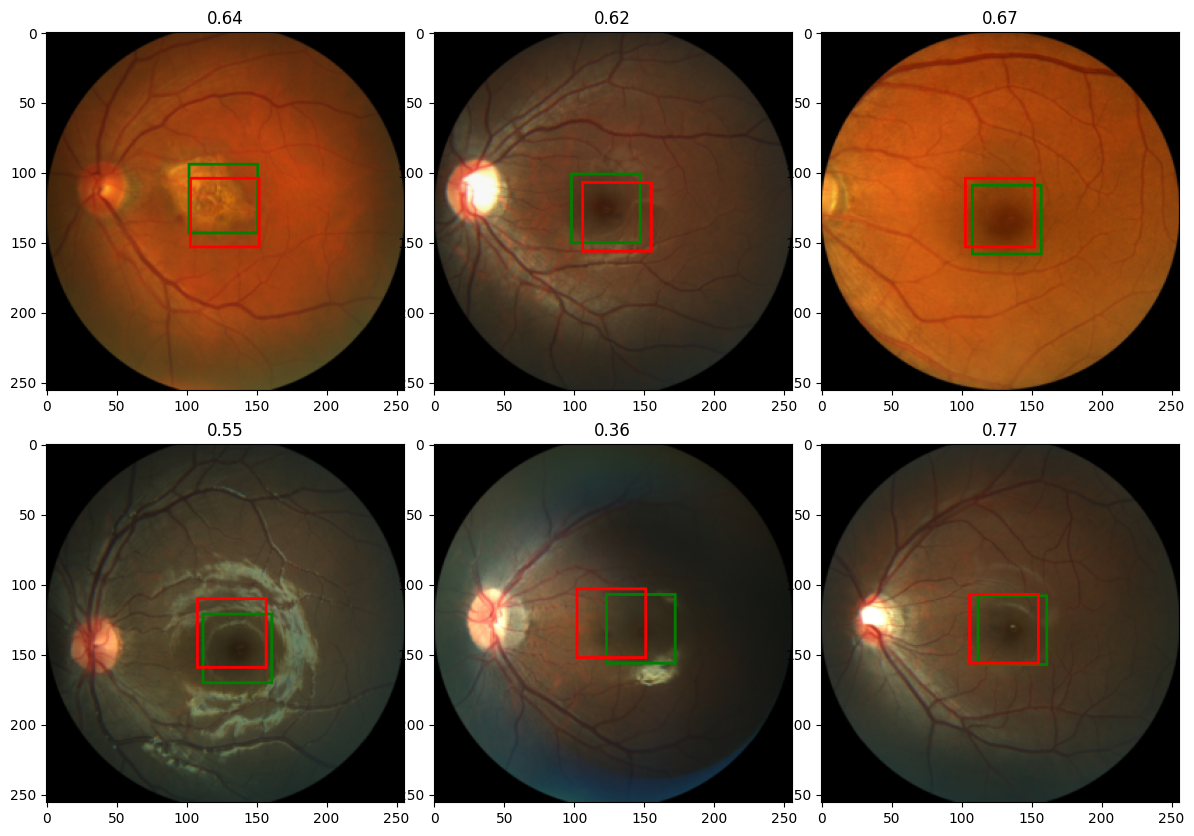

In [107]:
#Deploy model on the samples and display the predictions
plt.rcParams['figure.figsize'] = (15,10)
plt.subplots_adjust(wspace=0.0,hspace=0.15)

for i,rndi in enumerate(rndInds):
  img,label = val_ds[rndi]
  h,w = img.shape[1:]
  with torch.no_grad():
    label_pred = model(img.unsqueeze(0).to(device))[0].cpu()
  plt.subplot(2,3,i+1)
  show_tensor_2labels(img,label,label_pred)
  #Calculate IOU
  label_bb = cxcy2bbox(torch.tensor(label).unsqueeze(0))
  label_pred_bb = cxcy2bbox(label_pred.unsqueeze(0))
  iou = torchvision.ops.box_iou(label_bb,label_pred_bb)
  plt.title("%.2f" %iou.item())
  if i>4:
    break


(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)
torch.Size([3, 256, 256])


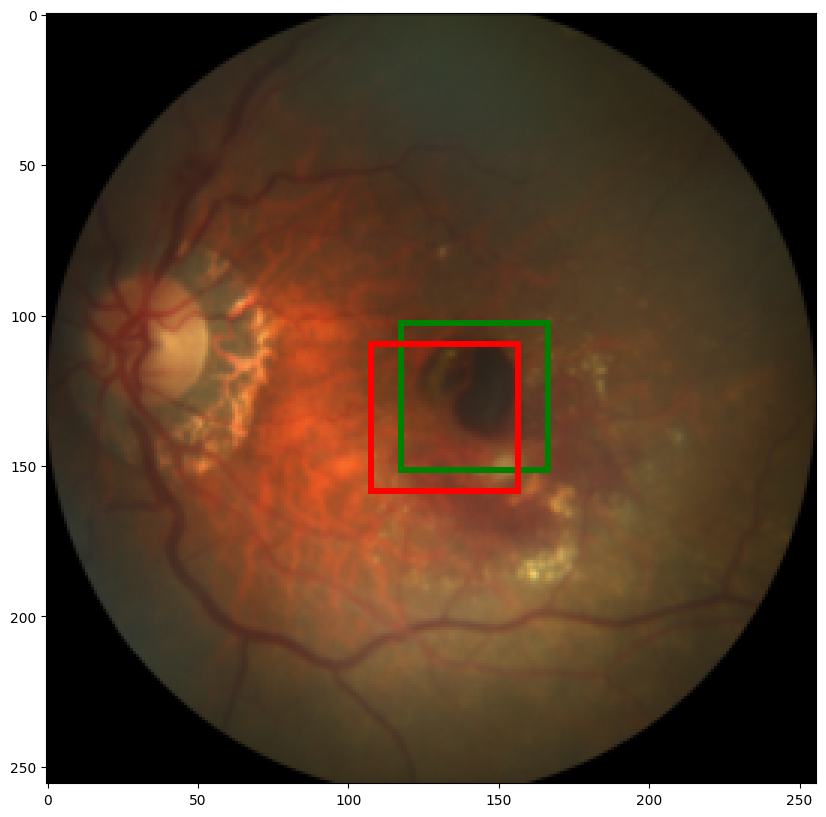

In [108]:
#DEploy the model on individual images
path2labels = os.path.join(path2data,"Training400","Fovea_location.xlsx")
labels_df = pd.read_excel(path2labels,index_col="ID")
img,label = load_img_label(labels_df,1)
print(img.size,label)
img,label = resize_img_label(img,label,target_size=(256,256))
print(img.size,label)

img = TF.to_tensor(img)
label = scale_label(label,(256,256))
print(img.shape)

with torch.no_grad():
  label_pred = model(img.unsqueeze(0).to(device))[0].cpu()
show_tensor_2labels(img,label,label_pred)

In [109]:
#inference time
import time
elapsed_times = []
with torch.no_grad():
  for k in range(100):
    start = time.time()
    label_pred = model(img.unsqueeze(0).to(device))[0].cpu()
    elapsed = time.time()-start
    elapsed_times.append(elapsed)
print("Inference time per image: %.4f s" %np.mean(elapsed_times))


Inference time per image: 0.0011 s
